# `Section 03: Diving deep into the Twitter API`


### 01- Streaming tweets
* Create your `Stream` object with the credentials given.
* Filter your Stream variable for the keywords` "clinton", "trump", "sanders", and "cruz"`.

In [ ]:
import tweepy
# Store credentials in relevant variables
consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""

# Create your Stream object with credentials
stream = tweepy.Stream(consumer_key, consumer_secret, access_token, access_token_secret)

# Filter your Stream variable
stream.filter(track=["clinton", "trump", "sanders", "cruz"])

### 02-Load and explore your Twitter data
* Assign the filename `'tweets.txt'` to the variable `tweets_data_path`.
* Initialize `tweets_data` as an empty list to store the tweets in.
* Within the `for` loop initiated by `for line in tweets_file:` , load each tweet into a variable, `tweet`, using `json.loads()`, then append `tweet` to `tweets_data` using the `append()` method.
* Hit submit and check out the keys of the first tweet dictionary printed to the shell.

In [4]:
# Import package
import json

# String of path to file: tweets_data_path
tweets_data_path = 'datasets/tweets.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())


dict_keys(['in_reply_to_user_id', 'created_at', 'filter_level', 'truncated', 'possibly_sensitive', 'timestamp_ms', 'user', 'text', 'extended_entities', 'in_reply_to_status_id', 'entities', 'favorited', 'retweeted', 'is_quote_status', 'id', 'favorite_count', 'retweeted_status', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'id_str', 'in_reply_to_screen_name', 'coordinates', 'lang', 'place', 'contributors', 'geo', 'retweet_count', 'source'])


### 03-Twitter data to DataFrame

* Use `pd.DataFrame()` to construct a DataFrame of tweet texts and languages; to do so, the first argument should be `tweets_data`, a list of dictionaries. The second argument to `pd.DataFrame()` is a list of the keys you wish to have as columns. Assign the result of the `pd.DataFrame()` call to `df`.
* Print the head of the DataFrame.

In [6]:
# Import package
import pandas as pd

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text', 'lang'])

# Print head of DataFrame
print(df.head())

                                                text lang
0  RT @bpolitics: .@krollbondrating's Christopher...   en
1  RT @HeidiAlpine: @dmartosko Cruz video found.....   en
2  Njihuni me Zonjën Trump !!! | Ekskluzive https...   et
3  Your an idiot she shouldn't have tried to grab...   en
4  RT @AlanLohner: The anti-American D.C. elites ...   en


### 04-A little bit of Twitter text analysis
Now that you have your DataFrame of tweets set up, you're going to do a bit of text analysis to count how many tweets contain the words `'clinton', 'trump', 'sanders' and 'cruz'`. In the pre-exercise code, we have defined the following function `word_in_text()`, which will tell you whether the first argument (a word) occurs within the 2nd argument (a tweet).

```
import re

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False
```

You're going to iterate over the rows of the DataFrame and calculate how many tweets contain each of our keywords! The list of objects for each candidate has been initialized to 0.



Within the `for` loop `for index, row in df.iterrows():`, the code currently increases the value of clinton by `1` each time a tweet (text row) mentioning `'Clinton'` is encountered; complete the code so that the same happens for `trump`, `sanders` and `cruz`.

In [11]:
from modules.words_text import word_in_text

In [12]:
# Initialize list to store tweet counts
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders',  row['text'])
    cruz += word_in_text('cruz',  row['text'])


In [14]:
[clinton, trump, sanders, cruz]

[9, 77, 6, 14]

### 05- Plotting your Twitter data
* Import both `matplotlib.pyplot` and `seaborn` using the aliases `plt` and `sns`, respectively.
* Complete the arguments of `sns.barplot`:
    * The first argument should be the list of labels to appear on the x-axis (created in the previous step).
    * The second argument should be a list of the variables you wish to plot, as produced in the previous exercise (i.e. a list containing `clinton`, `trump`, etc).

c:\Users\MOHAMAD\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


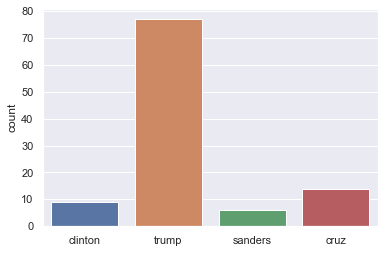

In [15]:
# Import packages
import matplotlib.pyplot as plt 
import seaborn as sns


# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['clinton', 'trump', 'sanders', 'cruz']

# Plot the bar chart
ax = sns.barplot(cd, [clinton, trump, sanders, cruz])
ax.set(ylabel="count")
plt.show()

==================================
### `The End`  
==================================